In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

np.__version__

'1.19.5'

# Pull in data (prepped in other notebook)

In [2]:
lyrics_df = pd.read_csv('./data/5-OUTPUT-lyric-lines-with-x-y-coords.csv')
lyrics_df

,performer,song,generic_genre,lyric_line,chart_debut,chart_debut_date_as_a_decimal,x,y
0,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,1974.97,12.719386,4.196199
1,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,1974.97,4.921566,8.455949
2,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,1974.97,13.257368,8.471434
3,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,1974.97,13.216287,10.251095
4,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,1974.97,9.527675,3.571829
...,...,...,...,...,...,...,...,...
172369,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,2021.41,6.787188,3.729738
172370,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,2021.41,7.999408,4.229088
172371,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,2021.41,8.164178,4.868974
172372,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,2021.41,11.343827,5.603119


# Normalize continuous fields (so we can animate between them)

In [3]:
def normalize_zero_to_one(s):
    return (s - s.min()) / (s.max() - s.min())

def normalize_x_and_y(data):
    temp = data.copy().dropna()
    temp['x'] = normalize_zero_to_one(temp.x)
    temp['y'] = normalize_zero_to_one(temp.y)
    NUM_DECIMALS = 6 # aka no rounding
    temp['x'] = temp['x'].round(NUM_DECIMALS)
    temp['y'] = temp['y'].round(NUM_DECIMALS)
    return temp

In [4]:
normalized_df = normalize_x_and_y(lyrics_df)
normalized_df['chart_debut_date_normalized_0_to_1'] = normalize_zero_to_one(
    normalized_df.chart_debut_date_as_a_decimal
).round(3)
normalized_df = normalized_df.drop(columns=['chart_debut_date_as_a_decimal'])
normalized_df

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1
0,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,0.645560,0.490051,0.255
1,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,0.355356,0.652787,0.255
2,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,0.665582,0.653379,0.255
3,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,0.664053,0.721367,0.255
4,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,0.526777,0.466198,0.255
...,...,...,...,...,...,...,...,...
172369,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,0.424787,0.472230,0.979
172370,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,0.469901,0.491307,0.979
172371,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,0.476033,0.515753,0.979
172372,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,0.594367,0.543800,0.979


<AxesSubplot:xlabel='x', ylabel='y'>

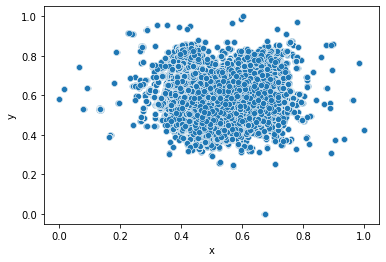

In [5]:
sns.scatterplot(
    data=normalized_df,
    x='x', y='y'
)

# Add an ID field

In [6]:
normalized_df['song_id'] = normalized_df.song + normalized_df.performer
normalized_df

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,song_id
0,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,0.645560,0.490051,0.255,#9 DreamJohn Lennon
1,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,0.355356,0.652787,0.255,#9 DreamJohn Lennon
2,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,0.665582,0.653379,0.255,#9 DreamJohn Lennon
3,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,0.664053,0.721367,0.255,#9 DreamJohn Lennon
4,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,0.526777,0.466198,0.255,#9 DreamJohn Lennon
...,...,...,...,...,...,...,...,...,...
172369,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,0.424787,0.472230,0.979,pride.is.the.devilJ. Cole & Lil Baby
172370,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,0.469901,0.491307,0.979,pride.is.the.devilJ. Cole & Lil Baby
172371,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,0.476033,0.515753,0.979,pride.is.the.devilJ. Cole & Lil Baby
172372,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,0.594367,0.543800,0.979,pride.is.the.devilJ. Cole & Lil Baby


# Add "categorical bands" for genre

In [7]:
genres_sorted_by_count = normalized_df.generic_genre.value_counts().index
genres_sorted_by_count

Index(['POP', 'ROCK', 'UNCATEGORIZED', 'HIP_HOP', 'JAZZ_INFLUENCED', 'ELECTRO',
       'COUNTRY', 'FUNK', 'LATIN', 'FOLK', 'REGGAE'],
      dtype='object')

In [8]:
normalized_df['genre_position_band'] = normalize_zero_to_one(
    normalized_df.generic_genre.replace(
        genres_sorted_by_count, # so it's SORTED BY MOST POPULAR
        range(0, len(genres_sorted_by_count))
    ).fillna(0).astype(int) # to be safe
)
normalized_df

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,song_id,genre_position_band
0,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,0.645560,0.490051,0.255,#9 DreamJohn Lennon,0.1
1,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,0.355356,0.652787,0.255,#9 DreamJohn Lennon,0.1
2,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,0.665582,0.653379,0.255,#9 DreamJohn Lennon,0.1
3,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,0.664053,0.721367,0.255,#9 DreamJohn Lennon,0.1
4,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,0.526777,0.466198,0.255,#9 DreamJohn Lennon,0.1
...,...,...,...,...,...,...,...,...,...,...
172369,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,0.424787,0.472230,0.979,pride.is.the.devilJ. Cole & Lil Baby,0.3
172370,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,0.469901,0.491307,0.979,pride.is.the.devilJ. Cole & Lil Baby,0.3
172371,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,0.476033,0.515753,0.979,pride.is.the.devilJ. Cole & Lil Baby,0.3
172372,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,0.594367,0.543800,0.979,pride.is.the.devilJ. Cole & Lil Baby,0.3


<AxesSubplot:>

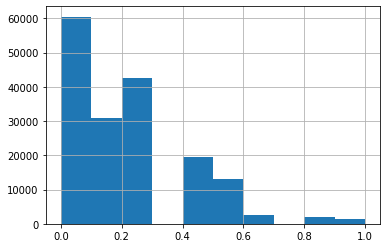

In [9]:
normalized_df.genre_position_band.hist()

# Export!

In [10]:
normalized_df.to_csv('./data/6-OUTPUT-lyric-lines-quadfeather-ready.csv', index=False)